In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
W_true = 2
b_true = 0.5

In [3]:
x = np.linspace(0, 3, 130)
y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

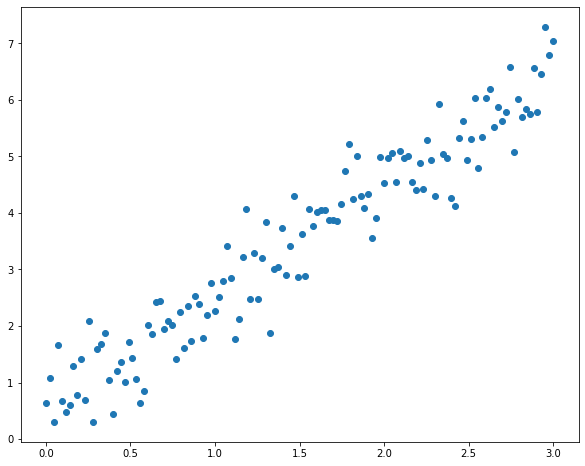

In [4]:
plt.figure(figsize=(10, 8))

plt.scatter(x,y)
plt.show()

In [5]:
class LinearModel:
    
    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name ='w')
        self.bias = tf.Variable(np.random.randn(), name = 'b')
        
    def __call__(self, x):
        return self.weight * x + self.bias

In [6]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y-y_pred))

In [7]:
def train(linear_model, x, y, lr= 0.01):
    with tf.GradientTape() as tape:
        y_pred = linear_model(x)
        current_loss = loss(y, y_pred)
        
    d_weight, d_bias = tape.gradient(current_loss,
                                    [linear_model.weight, linear_model.bias])
    
    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)
    

In [8]:
linear_model = LinearModel()
weights, biases = [], []
epochs = 100
lr = 0.15

In [9]:
for e_count in range(epochs):
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())
    
    real_loss = loss(y, linear_model(x))
    train(linear_model, x, y, lr=lr)
    print(f"Epoch count {e_count}: Loss value: {real_loss.numpy()}")

Epoch count 0: Loss value: 13.178321838378906
Epoch count 1: Loss value: 0.5207944512367249
Epoch count 2: Loss value: 0.2599310278892517
Epoch count 3: Loss value: 0.25451353192329407
Epoch count 4: Loss value: 0.2543644607067108
Epoch count 5: Loss value: 0.2543283998966217
Epoch count 6: Loss value: 0.25429844856262207
Epoch count 7: Loss value: 0.2542720139026642
Epoch count 8: Loss value: 0.2542487382888794
Epoch count 9: Loss value: 0.25422805547714233
Epoch count 10: Loss value: 0.25420981645584106
Epoch count 11: Loss value: 0.2541937232017517
Epoch count 12: Loss value: 0.2541795074939728
Epoch count 13: Loss value: 0.25416696071624756
Epoch count 14: Loss value: 0.25415584444999695
Epoch count 15: Loss value: 0.2541459798812866
Epoch count 16: Loss value: 0.2541373074054718
Epoch count 17: Loss value: 0.2541296184062958
Epoch count 18: Loss value: 0.25412285327911377
Epoch count 19: Loss value: 0.2541169226169586
Epoch count 20: Loss value: 0.25411155819892883
Epoch count 21:

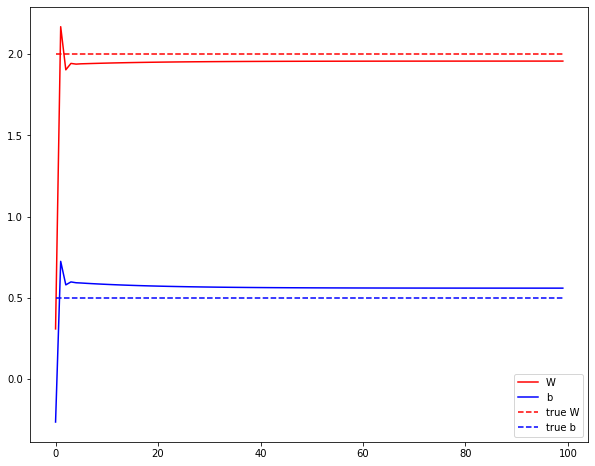

In [10]:
plt.figure(figsize=(10, 8))

plt.plot(range(epochs), weights, 'r', range(epochs), biases, 'b')
plt.plot([W_true] * epochs, 'r--', [b_true] * epochs, 'b--')

plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

In [11]:
linear_model.weight.numpy(), linear_model.bias.numpy()

(1.9564774, 0.55971795)

In [12]:
rmse = loss(y, linear_model(x))
rmse.numpy()

0.25407133

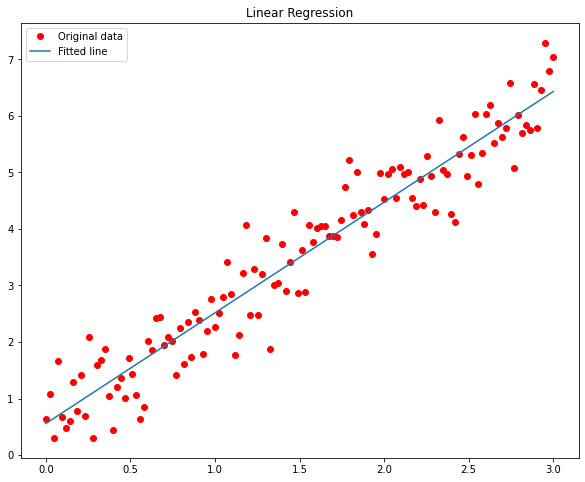

In [13]:
plt.figure(figsize=(10, 8))

plt.plot(x, y, 'ro', label ="Original data")
plt.plot(x, linear_model(x), label="Fitted line")

plt.title('Linear Regression')
plt.legend()
plt.show()

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
x.shape, y.shape

((130,), (130,))

In [17]:
x = pd.DataFrame(x, columns = ['x'])
y = pd.DataFrame(y, columns = ['y'])

x.head()

,x
0,0.000000
1,0.023256
2,0.046512
3,0.069767
4,0.093023


In [19]:
model = keras.Sequential([layers.Dense(1, 
                                       input_shape = (1,), 
                                       activation='linear')])
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
model.compile(loss = 'mse', metrics = ['mse'], optimizer = optimizer )

In [21]:
model.fit(x, y, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 1ms/step - loss: 15.5189 - mse: 15.5189
Epoch 2/100
5/5 [==============================] - 0s 642us/step - loss: 14.4706 - mse: 14.4706
Epoch 3/100
5/5 [==============================] - 0s 844us/step - loss: 13.3184 - mse: 13.3184
Epoch 4/100
5/5 [==============================] - 0s 664us/step - loss: 12.4599 - mse: 12.4599
Epoch 5/100
5/5 [==============================] - 0s 632us/step - loss: 11.5766 - mse: 11.5766
Epoch 6/100
5/5 [==============================] - 0s 723us/step - loss: 10.7874 - mse: 10.7874
Epoch 7/100
5/5 [==============================] - 0s 745us/step - loss: 10.0487 - mse: 10.0487
Epoch 8/100
5/5 [==============================] - 0s 1ms/step - loss: 9.3964 - mse: 9.3964
Epoch 9/100
5/5 [==============================] - 0s 718us/step - loss: 8.7726 - mse: 8.7726
Epoch 10/100
5/5 [==============================] - 0s 994us/step - loss: 8.1187 - mse: 8.1187
Epoch 11/100
5/5 [==============================]

5/5 [==============================] - 0s 1ms/step - loss: 0.3057 - mse: 0.3057
Epoch 88/100
5/5 [==============================] - 0s 661us/step - loss: 0.3033 - mse: 0.3033
Epoch 89/100
5/5 [==============================] - 0s 984us/step - loss: 0.3007 - mse: 0.3007
Epoch 90/100
5/5 [==============================] - 0s 711us/step - loss: 0.3006 - mse: 0.3006
Epoch 91/100
5/5 [==============================] - 0s 871us/step - loss: 0.2989 - mse: 0.2989
Epoch 92/100
5/5 [==============================] - 0s 1ms/step - loss: 0.2982 - mse: 0.2982
Epoch 93/100
5/5 [==============================] - 0s 790us/step - loss: 0.2952 - mse: 0.2952
Epoch 94/100
5/5 [==============================] - 0s 1ms/step - loss: 0.2946 - mse: 0.2946
Epoch 95/100
5/5 [==============================] - 0s 695us/step - loss: 0.2932 - mse: 0.2932
Epoch 96/100
5/5 [==============================] - 0s 698us/step - loss: 0.2930 - mse: 0.2930
Epoch 97/100
5/5 [==============================] - 0s 896us/step - l

In [22]:
y_pred = model.predict(x)

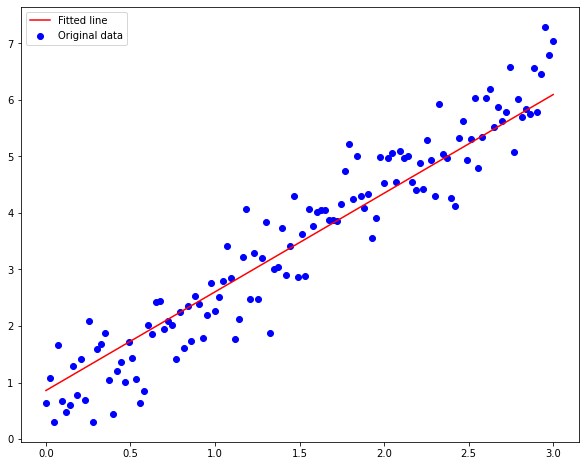

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue', label = 'Original data')
plt.plot(x, y_pred, color = 'r', label = 'Fitted line')
plt.legend()
plt.show()